In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def build_autoencoder(image,code_size):
    img_shape = image.shape
    
    encoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(img_shape),
        # Convolutional layer with 64 filters of size 3x3 and ReLU activation
        tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu',padding='same'),
        # Max pooling layer with pool size of 2x2 and stride of 2
        tf.keras.layers.MaxPool2D(pool_size=2,padding='same'),

        # Convolutional layer with 128 filters of size 3x3 and ReLU activation
        tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu',padding='same'),
        # Max pooling layer with pool size of 2x2 and stride of 2
        tf.keras.layers.MaxPool2D(pool_size=2,padding='same'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(code_size)
    ])
    
    decoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(code_size,),
        tf.keras.layers.Dense(np.prod(img_shape)),
        tf.keras.layers.Reshape(img_shape)
    ])
    return encoder,decoder


def image2grayscale(image):
    R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]
    imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B

    imgGray = imgGray.astype('float32') / 255.
    imgGray = imgGray.reshape((len(imgGray), np.prod(imgGray.shape[1:])))
    return imgGray

def show_image(x):
    plt.imshow(np.clip(x, 0, 255))


def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()


def train_autoencoder(image,code_size):
    encoder, decoder = build_autoencoder(image, code_size)

    inp = tf.keras.layers.Input(image.shape)
    code = encoder(inp)
    reconstruction = decoder(code)

    autoencoder = tf.keras.models.Model(inp,reconstruction)
    autoencoder.compile(optimizer='adamax', loss='mse')

    print(autoencoder.summary())
    
    history = autoencoder.fit(image[np.newaxis, ...], image[np.newaxis, ...], epochs=20)
    
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    return encoder,decoder
    



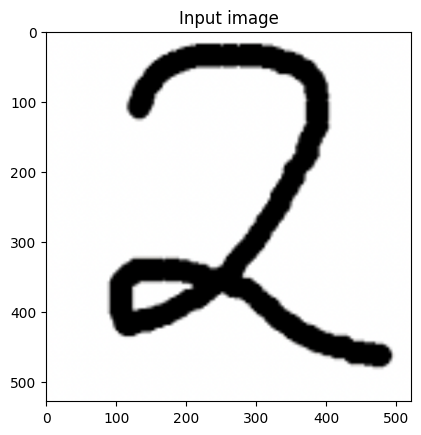

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 528, 522, 4)]     0         
                                                                 
 sequential (Sequential)     (None, 32)                4433768   
                                                                 
 sequential_1 (Sequential)   (None, 528, 522, 4)       36381312  
                                                                 
Total params: 40,815,080
Trainable params: 40,815,080
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20


2023-05-14 16:19:31.627211: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 344ms/step - loss: 0.8840
Epoch 2/20
1/1 [==============================] - 0s 113ms/step - loss: 1.4874
Epoch 3/20
1/1 [==============================] - 0s 114ms/step - loss: 0.5305
Epoch 4/20
1/1 [==============================] - 0s 114ms/step - loss: 0.1867
Epoch 5/20
1/1 [==============================] - 0s 116ms/step - loss: 0.0285
Epoch 6/20
1/1 [==============================] - 0s 119ms/step - loss: 0.1565
Epoch 7/20
1/1 [==============================] - 0s 111ms/step - loss: 0.0725
Epoch 8/20
1/1 [==============================] - 0s 113ms/step - loss: 0.0066
Epoch 9/20
1/1 [==============================] - 0s 113ms/step - loss: 0.0676
Epoch 10/20
1/1 [==============================] - 0s 116ms/step - loss: 0.1054
Epoch 11/20
1/1 [==============================] - 0s 118ms/step - loss: 0.0763
Epoch 12/20
1/1 [==============================] - 0s 118ms/step - loss: 0.0279
Epoch 13/20
1/1 [==============================] - 0s 112ms/

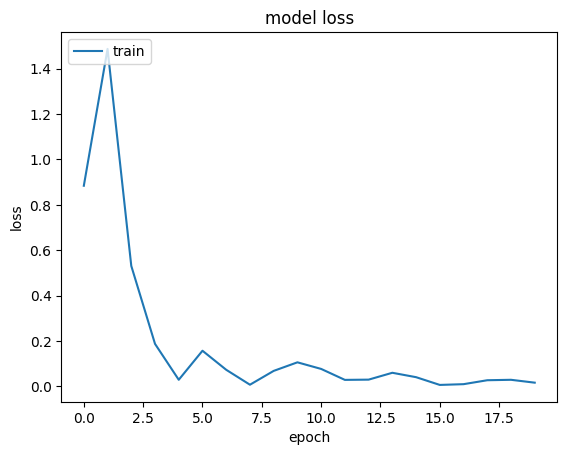

1/1 [==============================] - 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


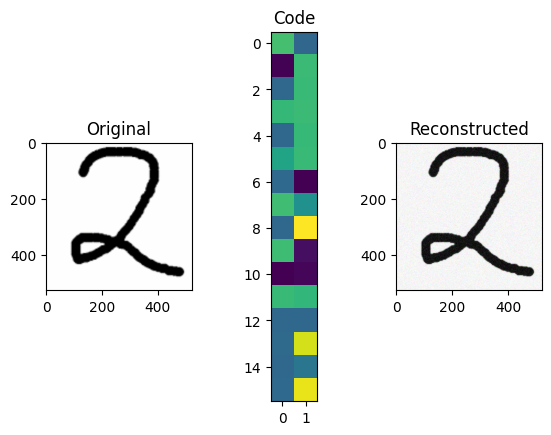

In [2]:
# Load the image
#Black and white image of digit 2
image = plt.imread('digit2.jpg')
plt.imshow(image)
plt.title('Input image')
plt.show()

train_encoder, train_decoder = train_autoencoder(image,32)
visualize(image,train_encoder,train_decoder)


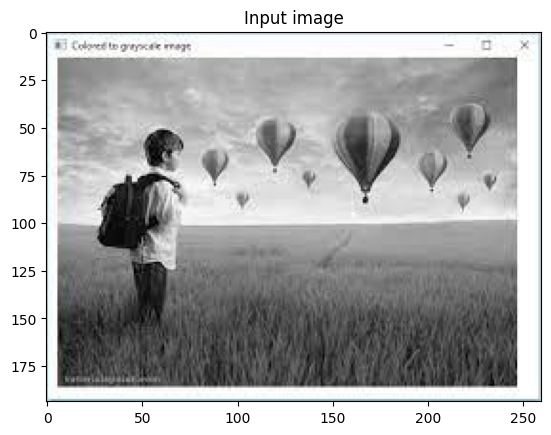

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 194, 260, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 256)               6529544   
                                                                 
 sequential_3 (Sequential)   (None, 194, 260, 3)       38889240  
                                                                 
Total params: 45,418,784
Trainable params: 45,418,784
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1/1 [==============================] - 0s 219ms/step - loss: 28360.3887
Epoch 2/20
1/1 [==============================] - 0s 50ms/step - loss: 28492.1914
Epoch 3/20
1/1 [==============================] - 0s 48ms/step - loss: 26965.1992
Epoch 4/20
1/1 [==============================] - 0s 50ms/s

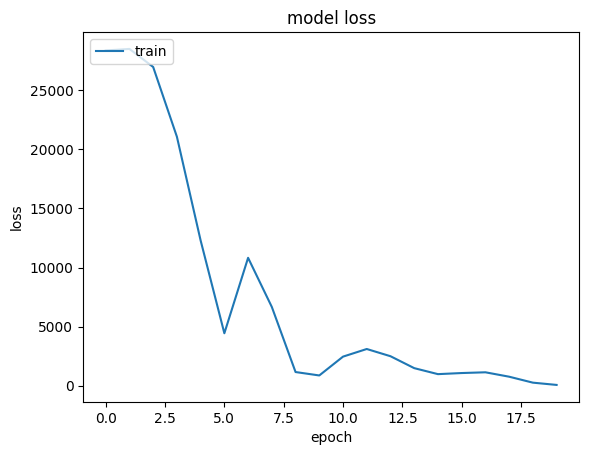

1/1 [==============================] - 0s 20ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


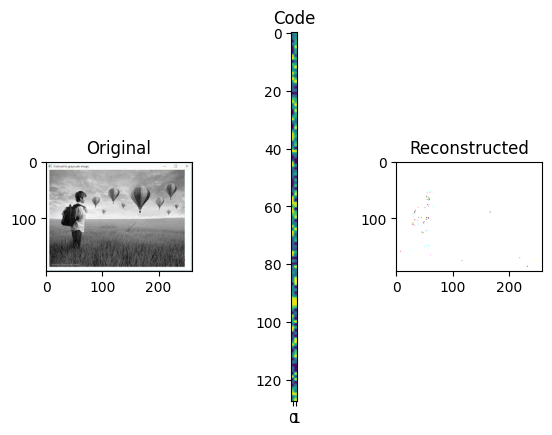

In [3]:
image = plt.imread('confuse.jpg')
plt.imshow(image)
plt.title('Input image')
plt.show()

train_encoder, train_decoder = train_autoencoder(image,256)
visualize(image,train_encoder,train_decoder)


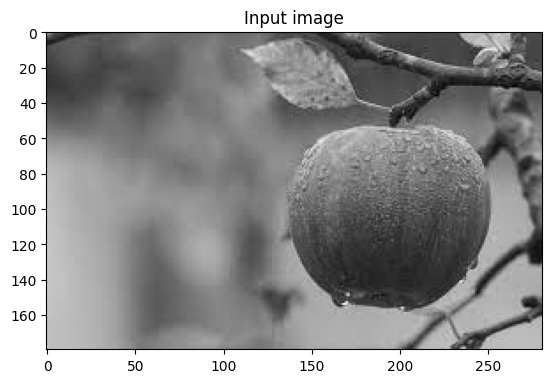

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_58 (InputLayer)       [(None, 180, 281, 3)]     0         
                                                                 
 sequential_28 (Sequential)  (None, 256)               6550024   
                                                                 
 sequential_29 (Sequential)  (None, 180, 281, 3)       38997180  
                                                                 
Total params: 45,547,204
Trainable params: 45,547,204
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1/1 [==============================] - 0s 293ms/step - loss: 16483.7676
Epoch 2/20
1/1 [==============================] - 0s 54ms/step - loss: 17040.1523
Epoch 3/20
1/1 [==============================] - 0s 55ms/step - loss: 15427.6289
Epoch 4/20
1/1 [==============================] - 0s 52ms/

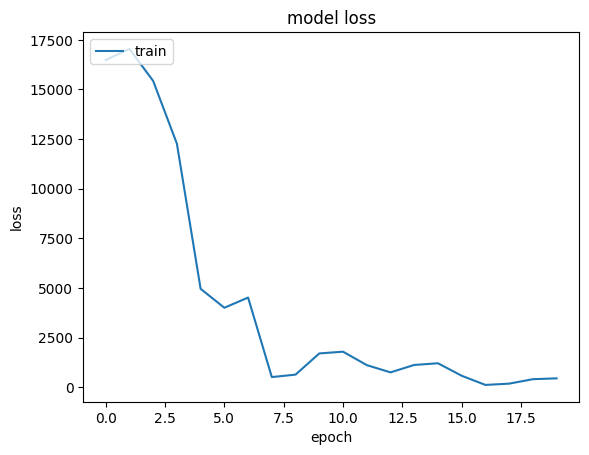

1/1 [==============================] - 0s 21ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


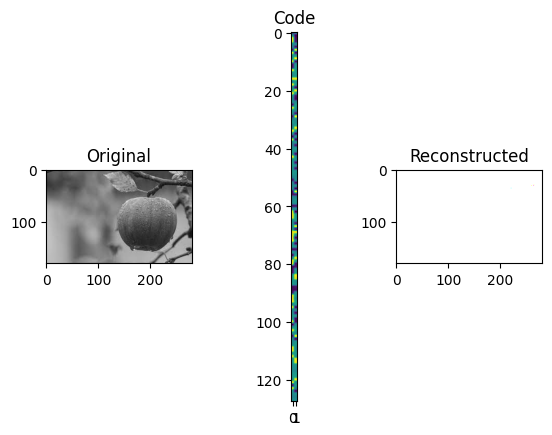

In [163]:
image = plt.imread('image_ml.jpg')
plt.imshow(image)
plt.title('Input image')
plt.show()

train_encoder, train_decoder = train_autoencoder(image,256)
visualize(image,train_encoder,train_decoder)


## Configuration of next run   
    code size  = 256
    epoch = 20
    encoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(img_shape),
        # Convolutional layer with 64 filters of size 3x3 and ReLU activation
        tf.keras.layers.Conv2D(4096, kernel_size=3, activation='relu',padding='same'),
        # Max pooling layer with pool size of 2x2 and stride of 2
        tf.keras.layers.MaxPool2D(pool_size=2,padding='same'),

        # Convolutional layer with 128 filters of size 3x3 and ReLU activation
        tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu',padding='same'),
        # Max pooling layer with pool size of 2x2 and stride of 2
        tf.keras.layers.MaxPool2D(pool_size=2,padding='same'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(code_size)
    ])
    
    decoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(code_size,),
        tf.keras.layers.Dense(np.prod(img_shape)),
        tf.keras.layers.Reshape(img_shape)
    ])


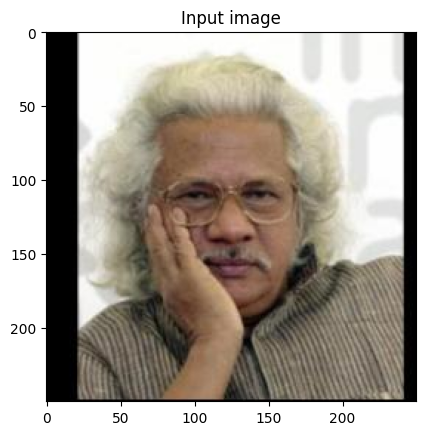

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 250, 250, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 256)               67502400  
                                                                 
 sequential_7 (Sequential)   (None, 250, 250, 3)       48187500  
                                                                 
Total params: 115,689,900
Trainable params: 115,689,900
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 24384.7051
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 105015.3906
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 190636.8281
Epoch 4/20
1/1 [==============================] - 2s 2s/step -

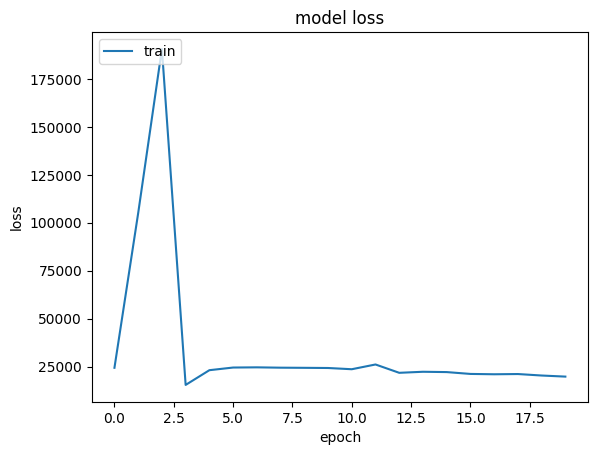

1/1 [==============================] - 0s 21ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


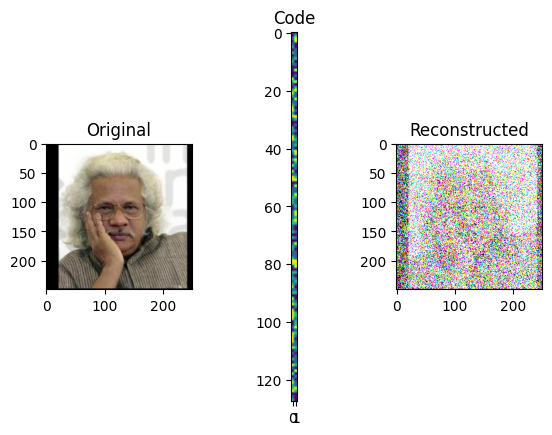

In [8]:
image = plt.imread('face.jpg')
plt.imshow(image)
plt.title('Input image')
plt.show()


train_encoder, train_decoder = train_autoencoder(image,1000)
visualize(image,train_encoder,train_decoder)


In [5]:
image.shape

(250, 250, 3)

## Configuration of next run   
    code size  = 1000
    epoch = 200
    encoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(img_shape),
        # Convolutional layer with 64 filters of size 3x3 and ReLU activation
        tf.keras.layers.Conv2D(4096, kernel_size=3, activation='relu',padding='same'),
        # Max pooling layer with pool size of 2x2 and stride of 2
        tf.keras.layers.MaxPool2D(pool_size=2,padding='same'),

        # Convolutional layer with 128 filters of size 3x3 and ReLU activation
        tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu',padding='same'),
        # Max pooling layer with pool size of 2x2 and stride of 2
        tf.keras.layers.MaxPool2D(pool_size=2,padding='same'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(code_size)
    ])
    
    decoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(code_size,),
        tf.keras.layers.Dense(np.prod(img_shape)),
        tf.keras.layers.Reshape(img_shape)
    ])


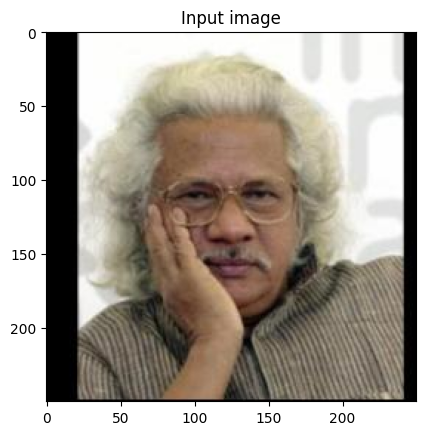

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 250, 250, 3)]     0         
                                                                 
 sequential_8 (Sequential)   (None, 1000)              1025617128
                                                                 
 sequential_9 (Sequential)   (None, 250, 250, 3)       187687500 
                                                                 
Total params: 1,213,304,628
Trainable params: 1,213,304,628
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
1/1 [==============================] - 24s 24s/step - loss: 24384.9805
Epoch 2/200
1/1 [==============================] - 46s 46s/step - loss: 4661005.5000
Epoch 3/200
1/1 [==============================] - 62s 62s/step - loss: 215079.3125
Epoch 4/200
1/1 [==============================]

1/1 [==============================] - 48s 48s/step - loss: 5664.5942
Epoch 90/200
1/1 [==============================] - 43s 43s/step - loss: 5654.6396
Epoch 91/200
1/1 [==============================] - 50s 50s/step - loss: 5644.3340
Epoch 92/200
1/1 [==============================] - 39s 39s/step - loss: 5634.4268
Epoch 93/200
1/1 [==============================] - 46s 46s/step - loss: 5624.8022
Epoch 94/200
1/1 [==============================] - 42s 42s/step - loss: 5614.7920
Epoch 95/200
1/1 [==============================] - 44s 44s/step - loss: 5604.3408
Epoch 96/200
1/1 [==============================] - 41s 41s/step - loss: 5594.0210
Epoch 97/200
1/1 [==============================] - 45s 45s/step - loss: 5583.9785
Epoch 98/200
1/1 [==============================] - 48s 48s/step - loss: 5573.7231
Epoch 99/200
1/1 [==============================] - 44s 44s/step - loss: 5563.0728
Epoch 100/200
1/1 [==============================] - 45s 45s/step - loss: 5552.4272
Epoch 101/200
1/

1/1 [==============================] - 43s 43s/step - loss: 3984.0259
Epoch 187/200
1/1 [==============================] - 56s 56s/step - loss: 3954.1741
Epoch 188/200
1/1 [==============================] - 43s 43s/step - loss: 3924.0283
Epoch 189/200
1/1 [==============================] - 40s 40s/step - loss: 3893.5930
Epoch 190/200
1/1 [==============================] - 48s 48s/step - loss: 3862.8755
Epoch 191/200
1/1 [==============================] - 48s 48s/step - loss: 3831.8806
Epoch 192/200
1/1 [==============================] - 44s 44s/step - loss: 3800.6125
Epoch 193/200
1/1 [==============================] - 42s 42s/step - loss: 3769.0764
Epoch 194/200
1/1 [==============================] - 43s 43s/step - loss: 3737.2820
Epoch 195/200
1/1 [==============================] - 91s 91s/step - loss: 3705.2375
Epoch 196/200
1/1 [==============================] - 44s 44s/step - loss: 3672.9507
Epoch 197/200
1/1 [==============================] - 46s 46s/step - loss: 3640.4268
Epoch 

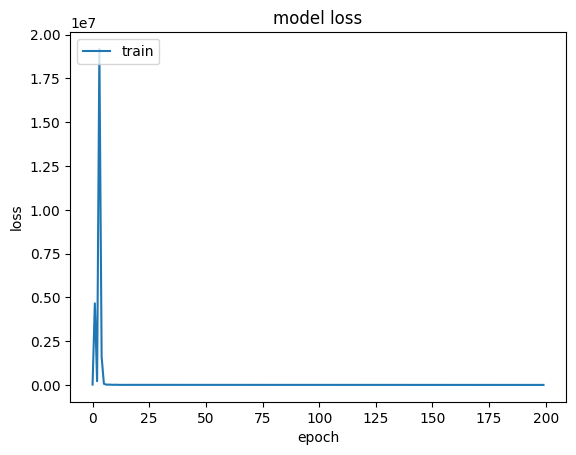

1/1 [==============================] - 6s 6s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


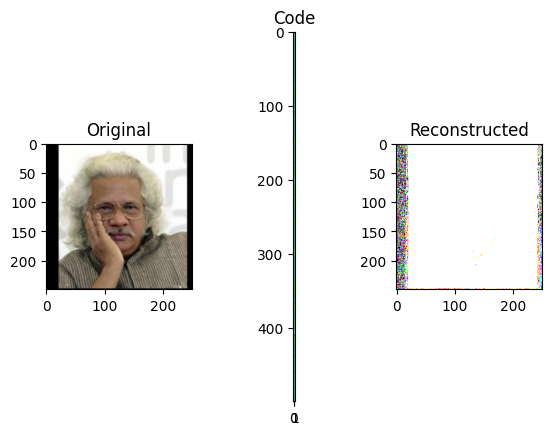

In [10]:
image = plt.imread('face.jpg')
plt.imshow(image)
plt.title('Input image')
plt.show()


train_encoder, train_decoder = train_autoencoder(image,256)
visualize(image,train_encoder,train_decoder)


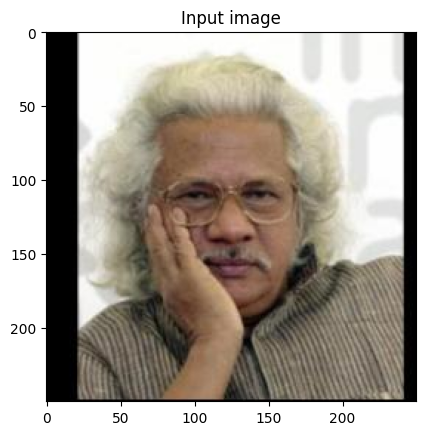

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 250, 250, 3)]     0         
                                                                 
 sequential_10 (Sequential)  (None, 512)               529777408 
                                                                 
 sequential_11 (Sequential)  (None, 250, 250, 3)       96187500  
                                                                 
Total params: 625,964,908
Trainable params: 625,964,908
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1/1 [==============================] - 10s 10s/step - loss: 24384.9277
Epoch 2/30
1/1 [==============================] - 9s 9s/step - loss: 2795119.0000
Epoch 3/30
1/1 [==============================] - 9s 9s/step - loss: 11119926.0000
Epoch 4/30
1/1 [==============================] - 9s 9s/s

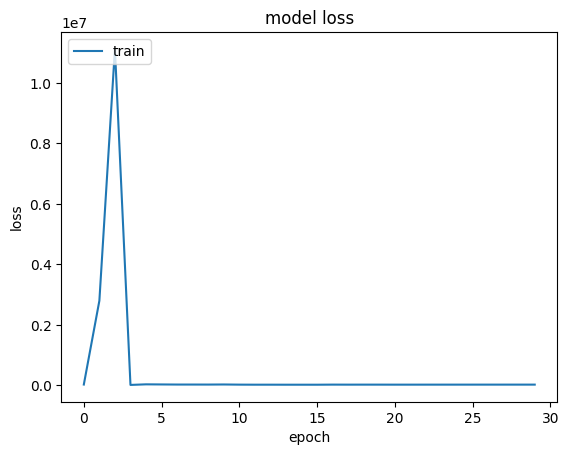

1/1 [==============================] - 0s 97ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


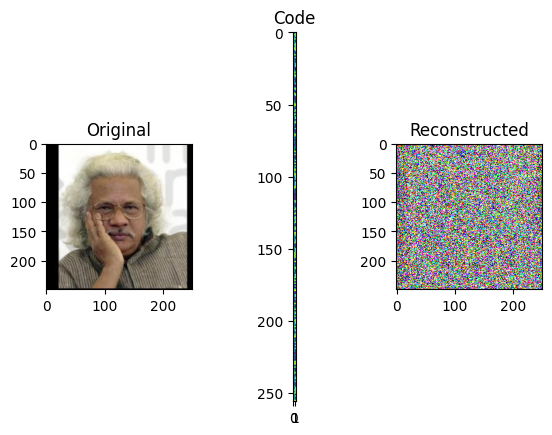

In [12]:
image = plt.imread('face.jpg')
plt.imshow(image)
plt.title('Input image')
plt.show()


train_encoder, train_decoder = train_autoencoder(image,512)
visualize(image,train_encoder,train_decoder)


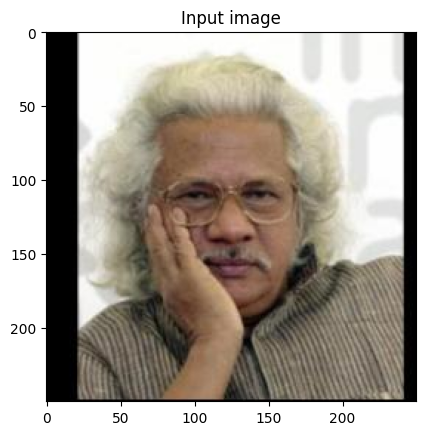

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 250, 250, 3)]     0         
                                                                 
 sequential_14 (Sequential)  (None, 256)               32595232  
                                                                 
 sequential_15 (Sequential)  (None, 250, 250, 3)       48187500  
                                                                 
Total params: 80,782,732
Trainable params: 80,782,732
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1/1 [==============================] - 0s 441ms/step - loss: 24385.8867
Epoch 2/20
1/1 [==============================] - 0s 156ms/step - loss: 35660.1289
Epoch 3/20
1/1 [==============================] - 0s 126ms/step - loss: 6577.8311
Epoch 4/20
1/1 [==============================] - 0s 133ms

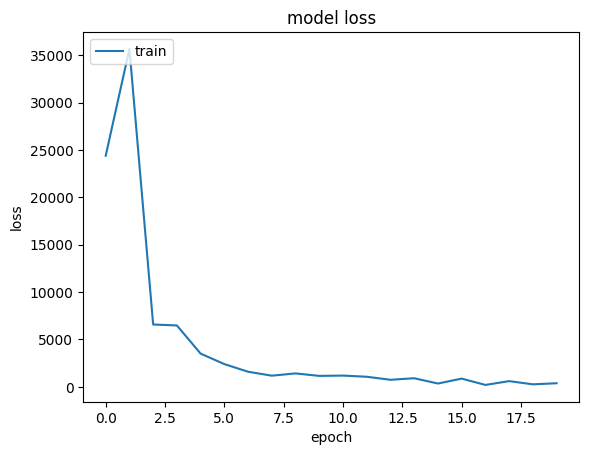

1/1 [==============================] - 0s 21ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


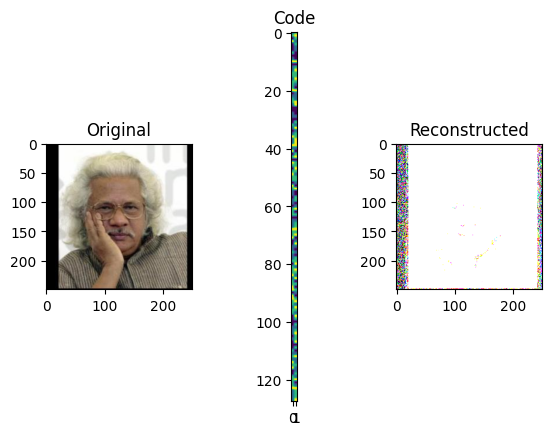

In [16]:
image = plt.imread('face.jpg')
plt.imshow(image)
plt.title('Input image')
plt.show()


train_encoder, train_decoder = train_autoencoder(image,256)
visualize(image,train_encoder,train_decoder)


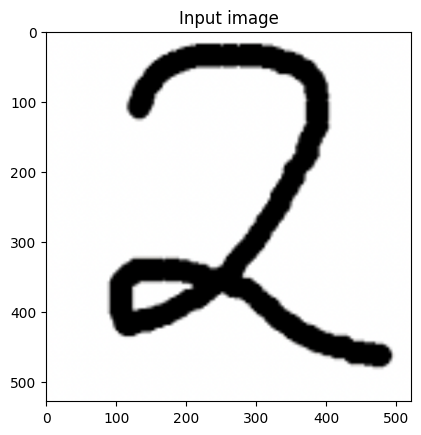

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 528, 522, 4)]     0         
                                                                 
 sequential_16 (Sequential)  (None, 256)               141739552 
                                                                 
 sequential_17 (Sequential)  (None, 528, 522, 4)       283333248 
                                                                 
Total params: 425,072,800
Trainable params: 425,072,800
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 0.8840
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 1.2067
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 0.1022
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 1.4494


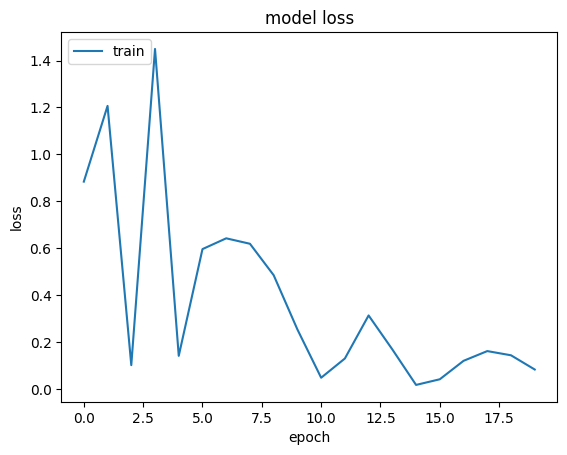

1/1 [==============================] - 0s 42ms/step


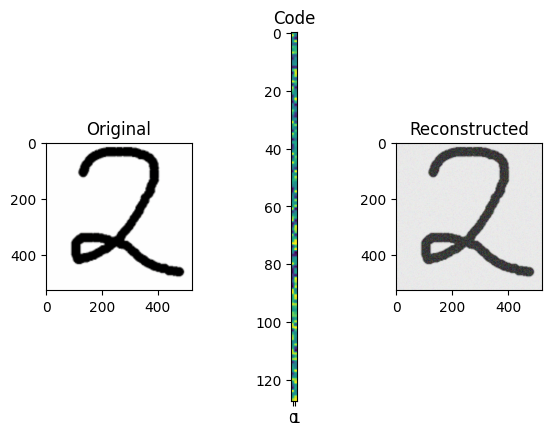

In [17]:
image = plt.imread('digit2.jpg')
plt.imshow(image)
plt.title('Input image')
plt.show()


train_encoder, train_decoder = train_autoencoder(image,256)
visualize(image,train_encoder,train_decoder)
